In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sounddevice as sd 
%matplotlib inline  

In [8]:
#Load Data
music=np.loadtxt('music.txt')
cd=np.loadtxt('corrupted_speech.txt')
fs=np.loadtxt('fs.txt')
m=music.size
N=cd.size
ERLE=[]
M = 100
u = 0.2
step = 0.1

In [9]:
# simple weight tracks easy~~
lc = []
Input=np.zeros((M,m-M+1))
Disire=np.zeros((M,N-M+1))
for i in range(0,m-M):
        temp_m= music[i:i+M]
        Input[:, i]= temp_m[::-1]
        temp_cd= cd[i:i+M]
        Disire[:, i]= temp_cd[::-1]
        for k in range(0,M-1):
            if i==0 or k==0:
                continue
            else:
                Input[k,i]=(1-u)*Input[k,i-1]+u*Input[k-1,i-1]
w=np.zeros((M,m-M+1)) 
weight_t=np.zeros((M,m-M+1))
y=np.zeros((1,m-M+1)) 
error=np.zeros((1,m-M+1))
for _ in range(20):
    for i in range(0,m-M):
        y[0, i]=w[:,i].T@Input[:,i]
        error[0,i]=Disire[0,i]-y[0,i]
        w[:,i+1]=w[:,i]+2*step*error[0,i]*Input[:,i]/(Input[:,i].T@Input[:,i])
        weight_t[:,i]=w[:,i+1]
        w[:,i]=weight_t[:,i]
    J=1/(2*(m-M+1))*error**2
    D=Disire[0,:]**2
    E=error[0,:]**2
    d=np.sum(D)
    e=np.sum(E)
    lc.append(np.sum(J))

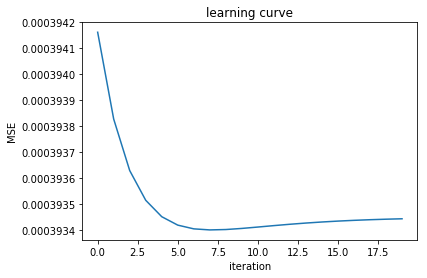

In [10]:
# plot learning curve
plt.plot(lc)
plt.title('learning curve')
plt.xlabel('iteration')
plt.ylabel('MSE')

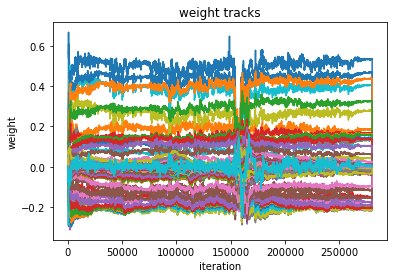

In [13]:
#plot weight track
for n in range(0,100,1):
    plt.plot(weight_t[n,:])
plt.xlabel('iteration')
plt.ylabel('weight')
plt.title('weight tracks')

In [11]:
print(weight_t.shape)

(100, 280124)


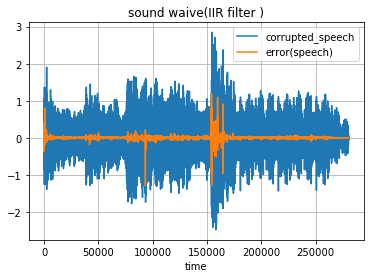

In [20]:
plt.plot(cd,label='corrupted_speech')
plt.legend(loc='upper right')
plt.plot(error[0],label='error(speech)')
plt.legend(loc='upper right')
plt.grid()
plt.title('sound waive(IIR filter )')
plt.xlabel('time')
plt.show()

In [18]:

import math
print(10*math.log10(d/e))

24.3188918915368


In [19]:
sd.play(error[0],fs)

In [23]:
np.savetxt('IIR_error.txt',error[0])

In [25]:
dd = np.loadtxt('IIR_error.txt')
sd.play(dd,fs)